- TITLE: 
- AUTHOR: John Kitchin




# ASSIGNED Multiple CSTR steady state solutions

It is possible for there to be more than one steady state solution to the CSTR mole balance. 

Consider the reaction: $A \rightarrow products$ with the rate law
$-r_A = \frac{1.75 C_A}{(1 + 10 C_A)^2}$. The inlet concentration of A is 1.5M at a volumetric flow of 0.15 L/min. The reactor volume is 5 liters.


## Part 1

Write the steady state mole balance for this reactor.




# Part 2

Define an objective function that could be used with fsolve to find the steady state exit concentration. Make a plot of your function from $C_{A,exit}=0 \textrm{ to } 1.5$ M. Note how many times your objective function is equal to zero.



In [1]:
# Function here

In [1]:
# plot here


# Part 3

Use the information from part 2 as initial guesses for fsolve to find all the exit concentrations that are possible.




# Part 4

Explain qualitatively why there are multiple exit concentrations in this example. Based on the mole balance how many exit concentrations do you expect to see and why?


# Solution


## Part 1

At steady state we have:

$0 = F_{A0} - F_A + V \frac{-1.75 C_A}{(1 + 10 C_A)^2}$


## Part 2

The objective function should return zero when you have a solution to the mole balance. The function is simply the right hand side of the equation written above.



In [1]:
Ca0 = 1.5 # M
v0 = 0.15 # L/min
V = 5 # L
Fa0 = v0 * Ca0

def objective(Ca):
    Fa = v0 * Ca
    return Fa0 - Fa + V * (-1.75 * Ca)/(1 + 10 * Ca)**2

To plot the function, we just evaluate it for an array of concentration values.



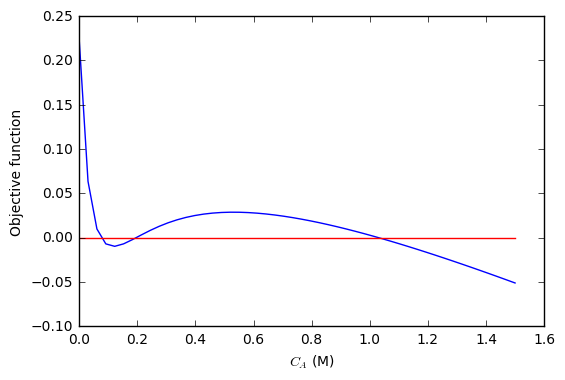

In [1]:
import numpy as np

CA = np.linspace(0, 1.5)
obj = objective(CA)

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(CA, obj)
plt.plot([0, 1.5], [0, 0], 'r-')
plt.xlabel('$C_A$ (M)')
plt.ylabel('Objective function')

<font color="red">daniellee
: null</font>

You can see from the graph that there are three places where the objective function is equal to zero. Each of these is a solution to the mole balance.


# Part 3



In [1]:
from scipy.optimize import fsolve

guess = [0.05, 0.2, 1.0]

sols = fsolve(objective, guess)

for ans in sols:
    print('There is a solution at Ca={:1.2f} M.'.format(ans))

There is a solution at Ca=0.07 M.
There is a solution at Ca=0.20 M.
There is a solution at Ca=1.03 M.


# Part 4

The steady state mole balance in this case is nonlinear in $C_A$. In fact, you can see that it is a third-order polynomial in $C_A$ if you multiply each term by $(1 + 10 C_A)^2$ and expand the terms. So, you should expect that there are three solutions in this case. 

